<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/ubercasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.float_format', lambda x:'%.2f' %x) # only show 3 decimal places for floats

In [2]:
data = pd.read_csv('/content/Uber_Data.csv')
data.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,01-01-2015 01:00,Bronx,152,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
1,01-01-2015 01:00,Brooklyn,1519,5.00,10.00,NaN,7.00,1023.50,0.00,0.00,0.00,0.00,Y
2,01-01-2015 01:00,EWR,0,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
3,01-01-2015 01:00,Manhattan,5258,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
4,01-01-2015 01:00,Queens,405,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y


In [3]:
data.shape

(29101, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pickup_dt,29101,4343,01-01-2015 01:00,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borough,26058,6,Bronx,4343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickups,29101.00,NaN,NaN,NaN,490.22,995.65,0.00,1.00,54.00,449.00,7883.00
spd,29101.00,NaN,NaN,NaN,5.98,3.70,0.00,3.00,6.00,8.00,21.00
vsb,29101.00,NaN,NaN,NaN,8.82,2.44,0.00,9.10,10.00,10.00,10.00
temp,28742.00,NaN,NaN,NaN,47.90,19.80,2.00,32.00,46.50,65.00,89.00
dewp,29101.00,NaN,NaN,NaN,30.82,21.28,-16.00,14.00,30.00,50.00,73.00
slp,29101.00,NaN,NaN,NaN,1017.82,7.77,991.40,1012.50,1018.20,1022.90,1043.40
pcp01,29101.00,NaN,NaN,NaN,0.00,0.02,0.00,0.00,0.00,0.00,0.28
pcp06,29101.00,NaN,NaN,NaN,0.03,0.09,0.00,0.00,0.00,0.00,1.24


In [6]:
data.isna().sum()

pickup_dt       0
borough      3043
pickups         0
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

In [11]:
data['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       nan], dtype=object)

In [12]:
data['hday'].value_counts(normalize = True)

N   0.96
Y   0.04
Name: hday, dtype: float64

In [17]:
data['pickup_dt'] = pd.to_datetime(data['pickup_dt'], format = '%d-%m-%Y %H:%M')

In [18]:
data.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.00,10.00,NaN,7.00,1023.50,0.00,0.00,0.00,0.00,Y
2,2015-01-01 01:00:00,EWR,0,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y
4,2015-01-01 01:00:00,Queens,405,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pickup_dt  29101 non-null  datetime64[ns]
 1   borough    26058 non-null  object        
 2   pickups    29101 non-null  int64         
 3   spd        29101 non-null  float64       
 4   vsb        29101 non-null  float64       
 5   temp       28742 non-null  float64       
 6   dewp       29101 non-null  float64       
 7   slp        29101 non-null  float64       
 8   pcp01      29101 non-null  float64       
 9   pcp06      29101 non-null  float64       
 10  pcp24      29101 non-null  float64       
 11  sd         29101 non-null  float64       
 12  hday       29101 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.9+ MB


In [20]:
data['pickup_dt'].min()

Timestamp('2015-01-01 01:00:00')

In [21]:
data['pickup_dt'].max()

Timestamp('2015-06-30 23:00:00')

In [23]:
data['start_year'] = data.pickup_dt.dt.year
data['start_month'] = data.pickup_dt.dt.month_name()
data['start_hour'] = data.pickup_dt.dt.hour
data['start_day'] = data.pickup_dt.dt.day
data['week_day'] = data.pickup_dt.dt.day_name()

In [24]:
data.drop('pickup_dt', axis = 1, inplace = True)

In [25]:
data.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
0,Bronx,152,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
1,Brooklyn,1519,5.00,10.00,NaN,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
2,EWR,0,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
3,Manhattan,5258,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday
4,Queens,405,5.00,10.00,30.00,7.00,1023.50,0.00,0.00,0.00,0.00,Y,2015,January,1,1,Thursday


In [26]:
data.borough.value_counts(normalize = True, dropna = False)

Bronx           0.15
Brooklyn        0.15
EWR             0.15
Manhattan       0.15
Queens          0.15
Staten Island   0.15
NaN             0.10
Name: borough, dtype: float64

In [27]:
data['borough'].fillna('Unknown', inplace = True)

In [28]:
data['borough'].unique()

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

In [29]:
data.isna().sum()

borough          0
pickups          0
spd              0
vsb              0
temp           359
dewp             0
slp              0
pcp01            0
pcp06            0
pcp24            0
sd               0
hday             0
start_year       0
start_month      0
start_hour       0
start_day        0
week_day         0
dtype: int64

In [30]:
data['temp'] = data['temp'].fillna(value = data.loc[data['borough'] == 'Brooklyn', 'temp'].mean())

In [31]:
data.isnull().sum()

borough        0
pickups        0
spd            0
vsb            0
temp           0
dewp           0
slp            0
pcp01          0
pcp06          0
pcp24          0
sd             0
hday           0
start_year     0
start_month    0
start_hour     0
start_day      0
week_day       0
dtype: int64

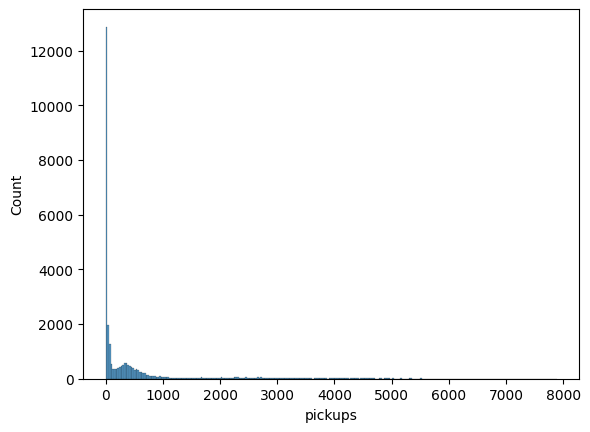

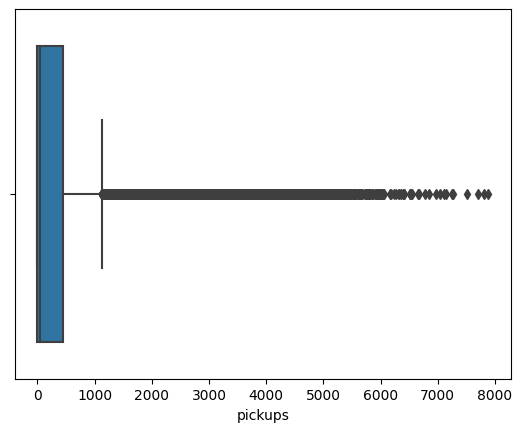

In [33]:
sns.histplot(data = data, x ='pickups')
plt.show()
sns.boxplot(data = data, x = 'pickups')
plt.show()

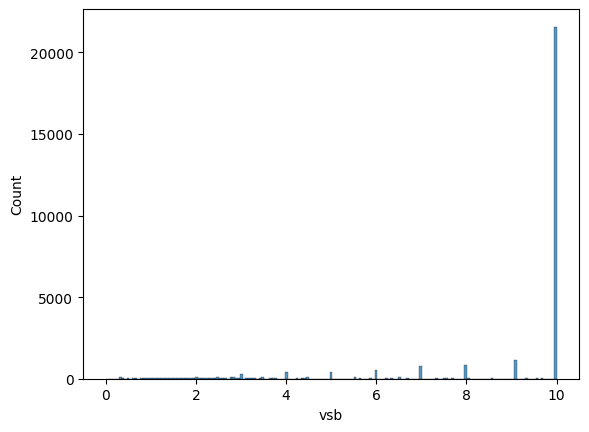

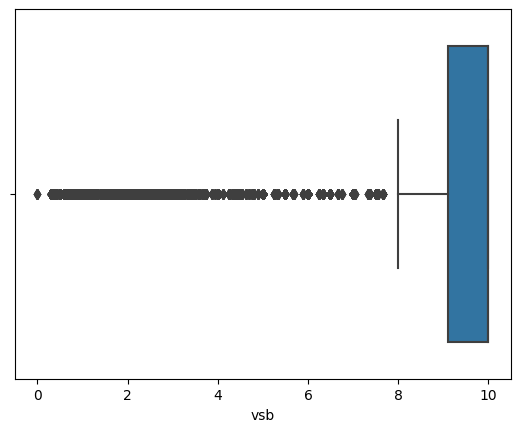

In [34]:
sns.histplot(data = data, x ='vsb')
plt.show()
sns.boxplot(data = data, x = 'vsb')
plt.show()

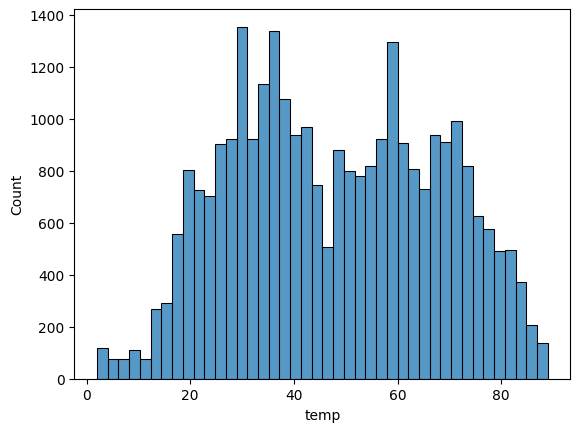

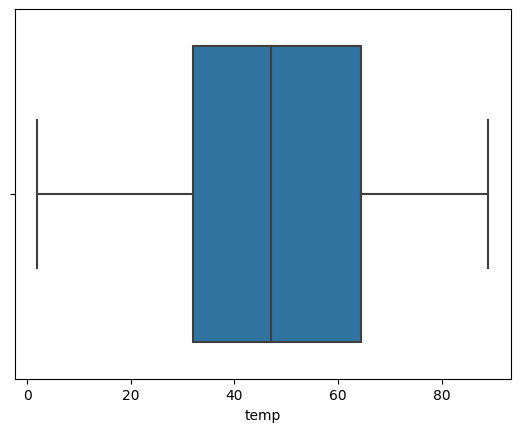

In [35]:
sns.histplot(data = data, x ='temp')
plt.show()
sns.boxplot(data = data, x = 'temp')
plt.show()

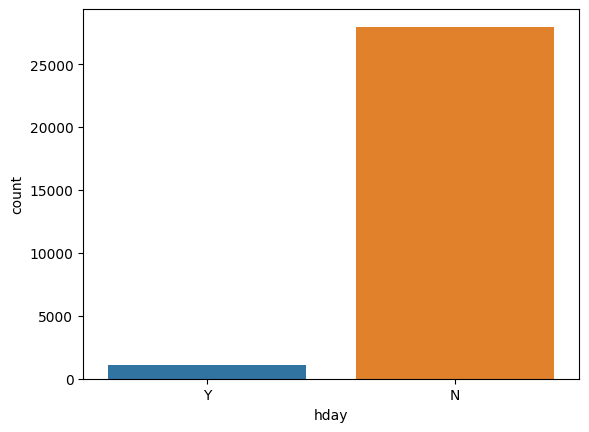

In [36]:
sns.countplot(data = data, x = 'hday');

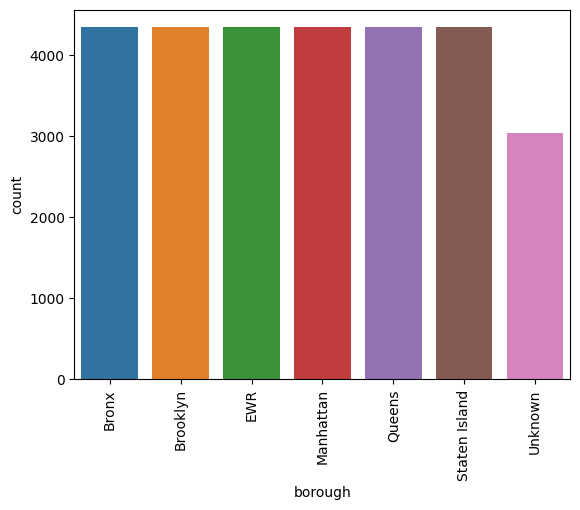

In [37]:
sns.countplot(data = data, x = 'borough')
plt.xticks(rotation = 90);

<ipython-input-40-4cc1e55fe6d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True, cmap = 'Spectral', fmt = '.2f');


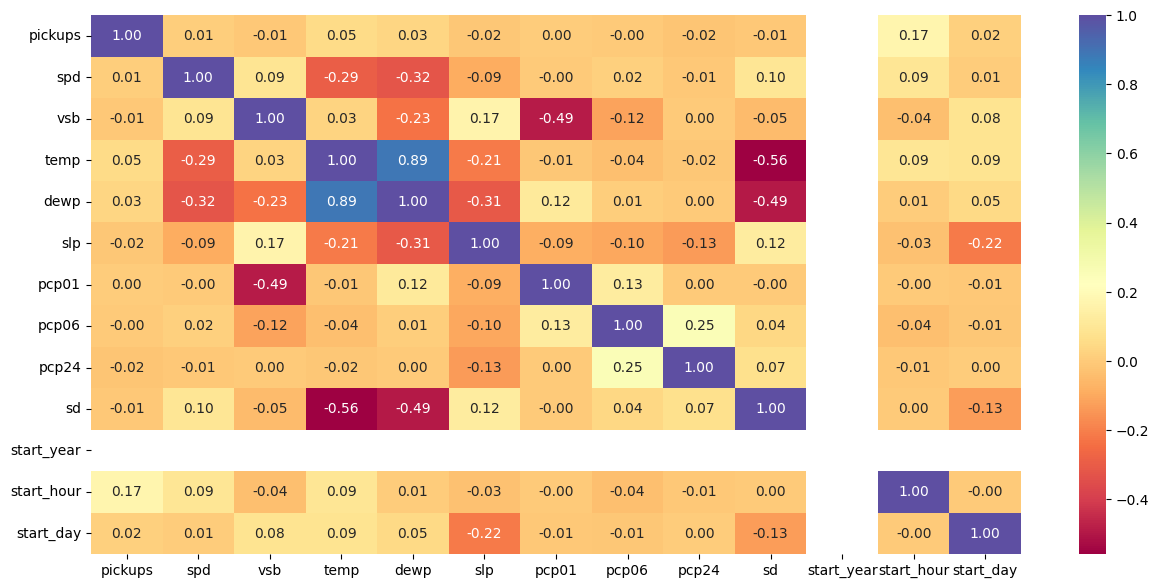

In [40]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot= True, cmap = 'Spectral', fmt = '.2f');

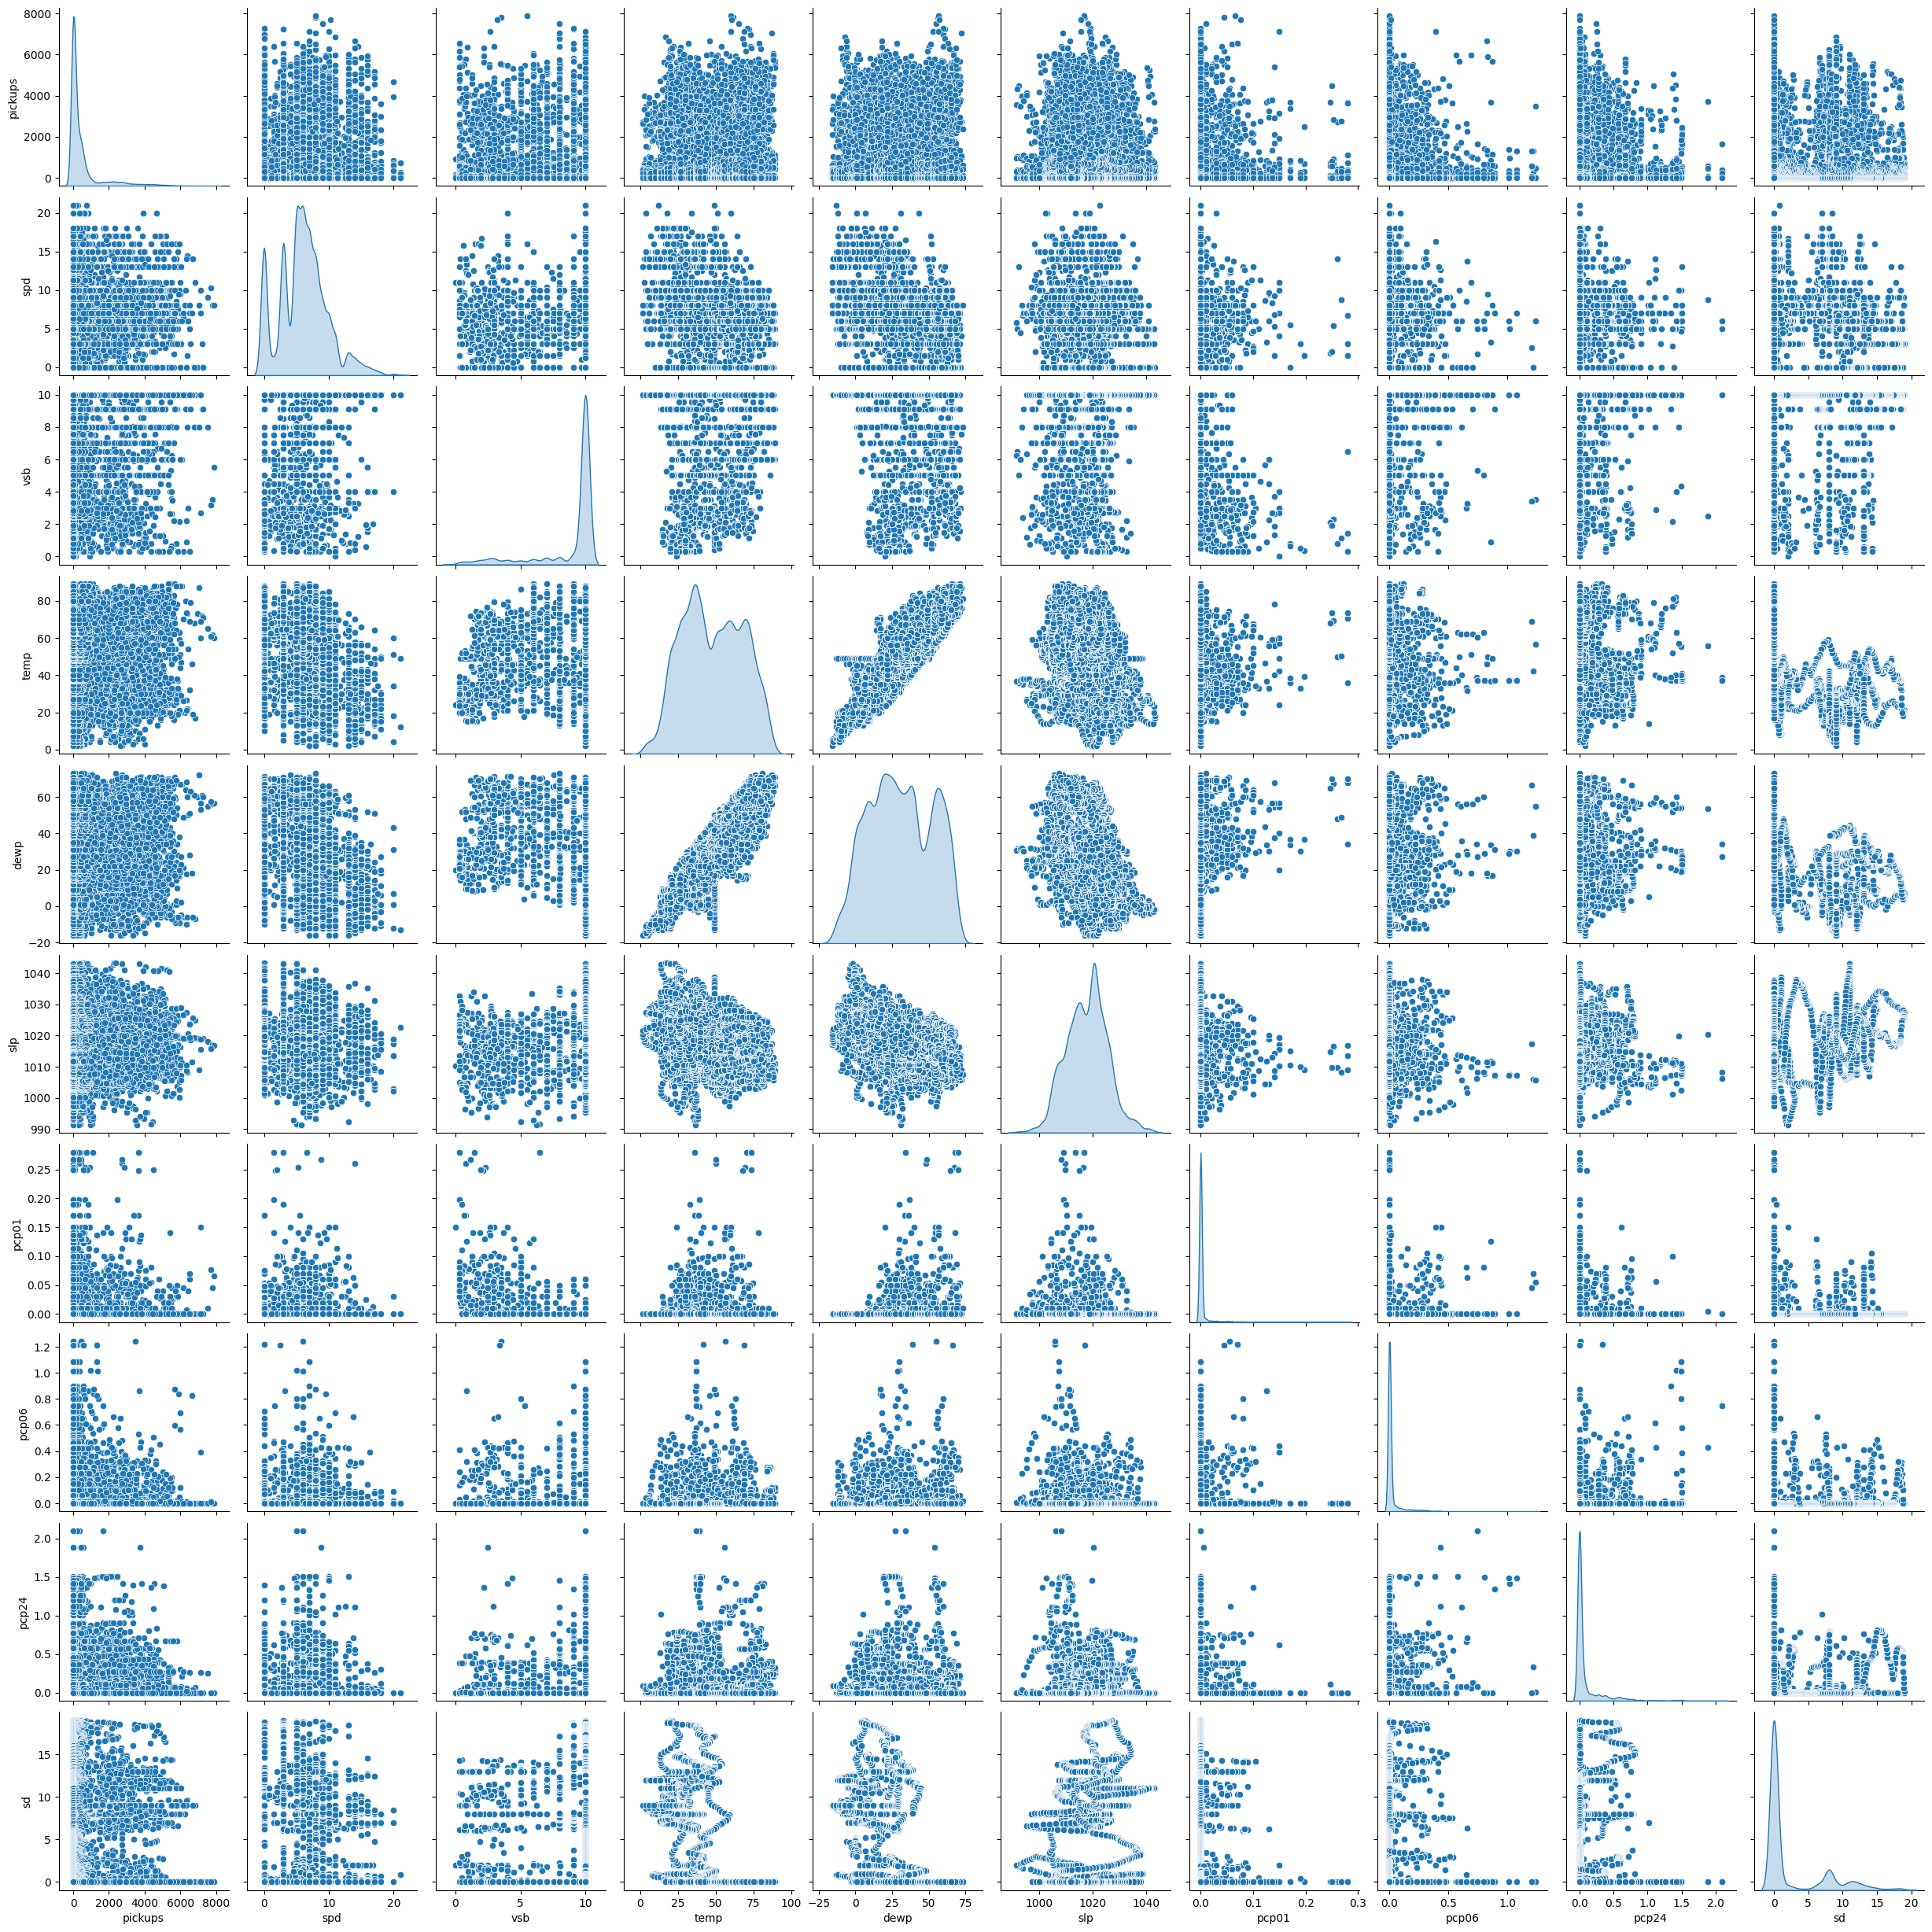

In [41]:
num_var = ['pickups','spd','vsb','temp','dewp','slp','pcp01','pcp06','pcp24','sd']
sns.pairplot(data = data[num_var], diag_kind = 'kde');

Pickups across the months

<ipython-input-45-5d7d8e9dc709>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = data, x='start_month', y = 'pickups', ci = False, color = 'red', estimator = 'sum')


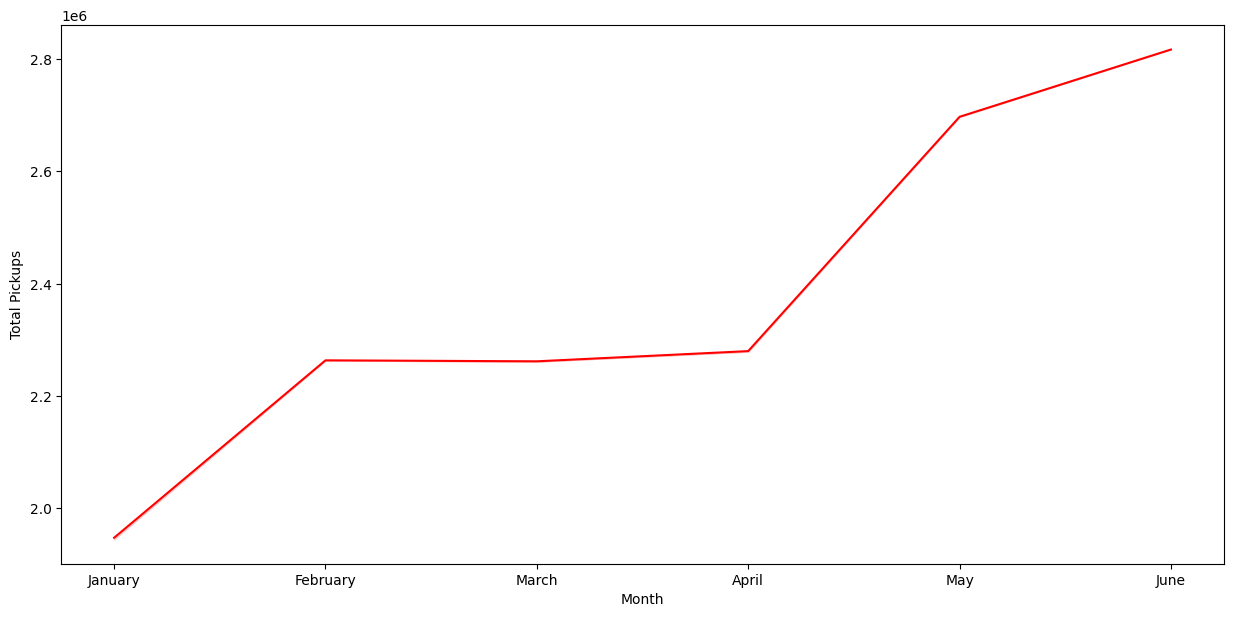

In [45]:
cats = data.start_month.unique().tolist()
data.start_month = pd.Categorical(data.start_month, ordered = True, categories = cats)

plt.figure(figsize =(15,7))
sns.lineplot(data = data, x='start_month', y = 'pickups', ci = False, color = 'red', estimator = 'sum')
plt.ylabel('Total Pickups')
plt.xlabel('Month')
plt.show()


Pickups across hour of day

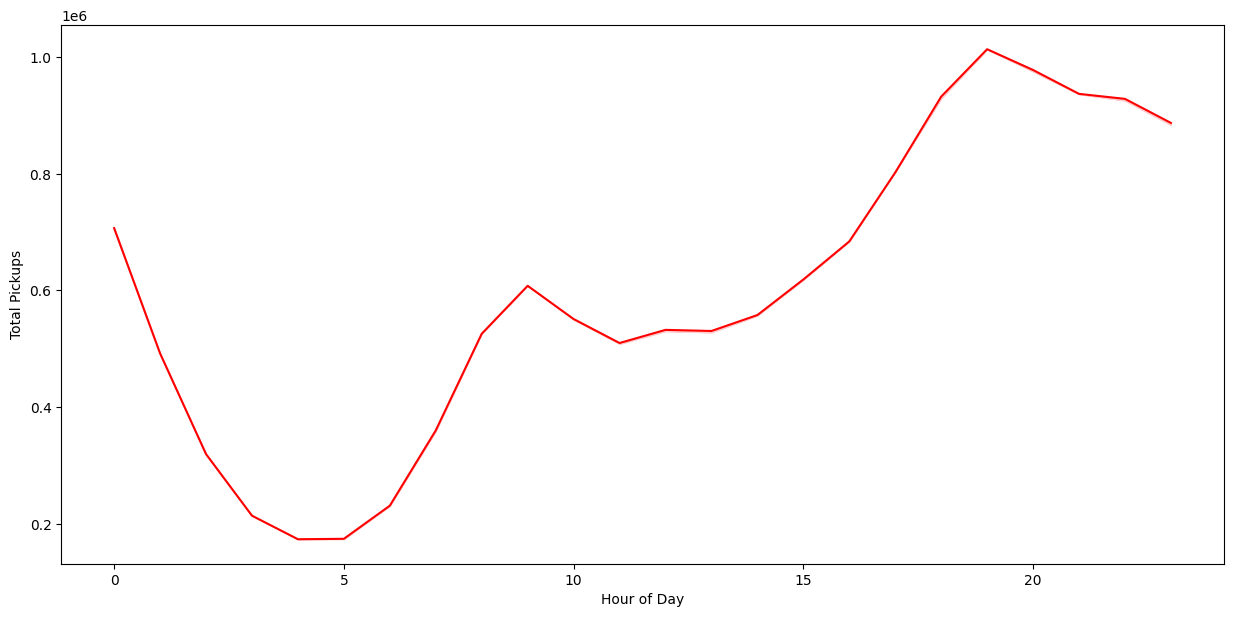

In [47]:
plt.figure(figsize =(15,7))
sns.lineplot(data = data, x='start_hour', y = 'pickups', errorbar=('ci', False), color = 'red', estimator = 'sum')
plt.ylabel('Total Pickups')
plt.xlabel('Hour of Day')
plt.show()


Pickups across day of the week

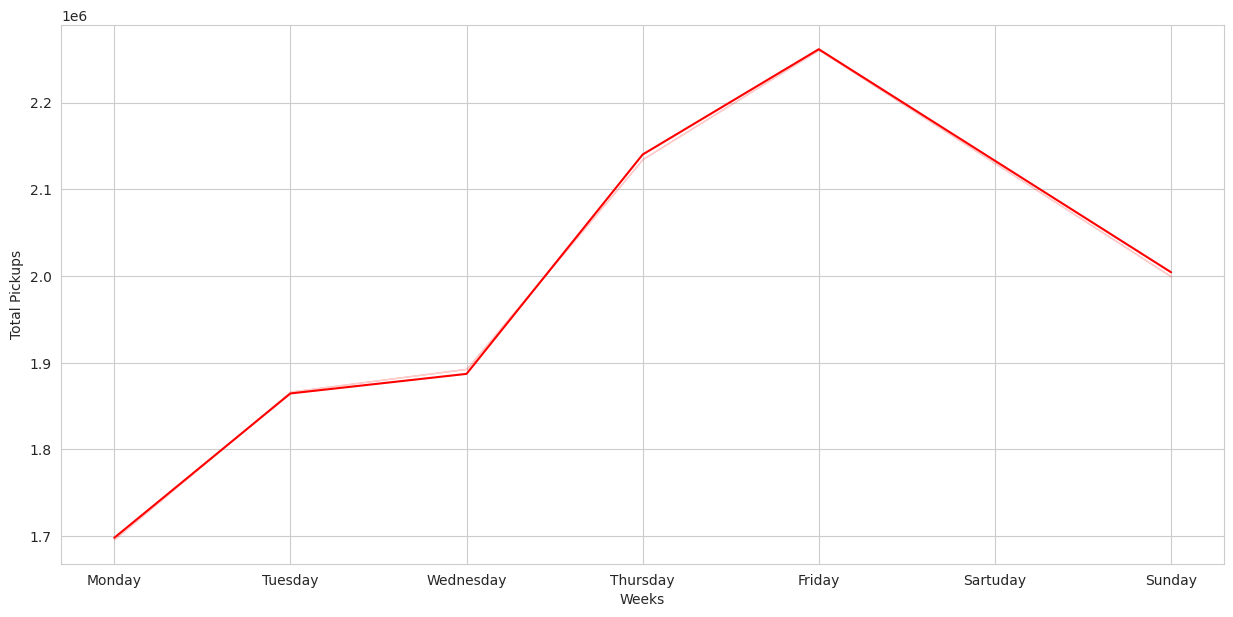

In [51]:
cats =['Monday','Tuesday','Wednesday','Thursday','Friday','Sartuday','Sunday']
data.week_day = pd.Categorical(data.week_day, ordered = True, categories = cats)

plt.figure(figsize =(15,7))
sns.lineplot(data = data, x='week_day', y = 'pickups',errorbar=('ci', False), color = 'red', estimator = 'sum')
sns.set_style("darkgrid")
plt.ylabel('Total Pickups')
plt.xlabel('Weeks')
plt.show()


Pickups across towns

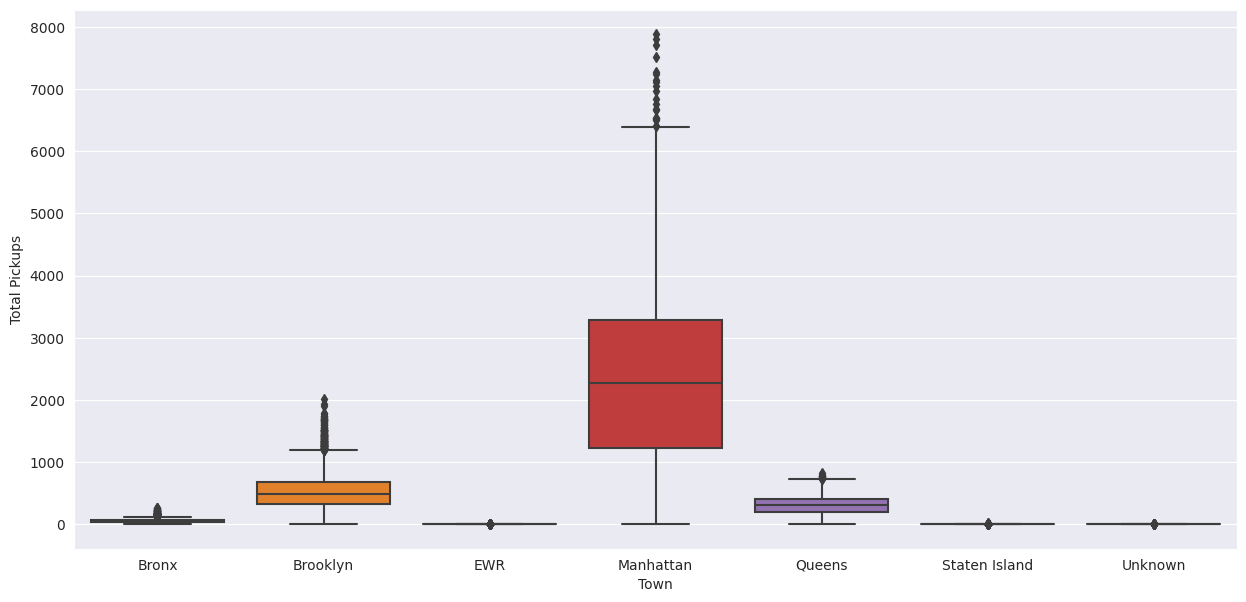

In [53]:
plt.figure(figsize =(15,7))
sns.boxplot(x = data['borough'], y = data['pickups'])
sns.set_style("darkgrid")
plt.ylabel('Total Pickups')
plt.xlabel('Town')
plt.show()

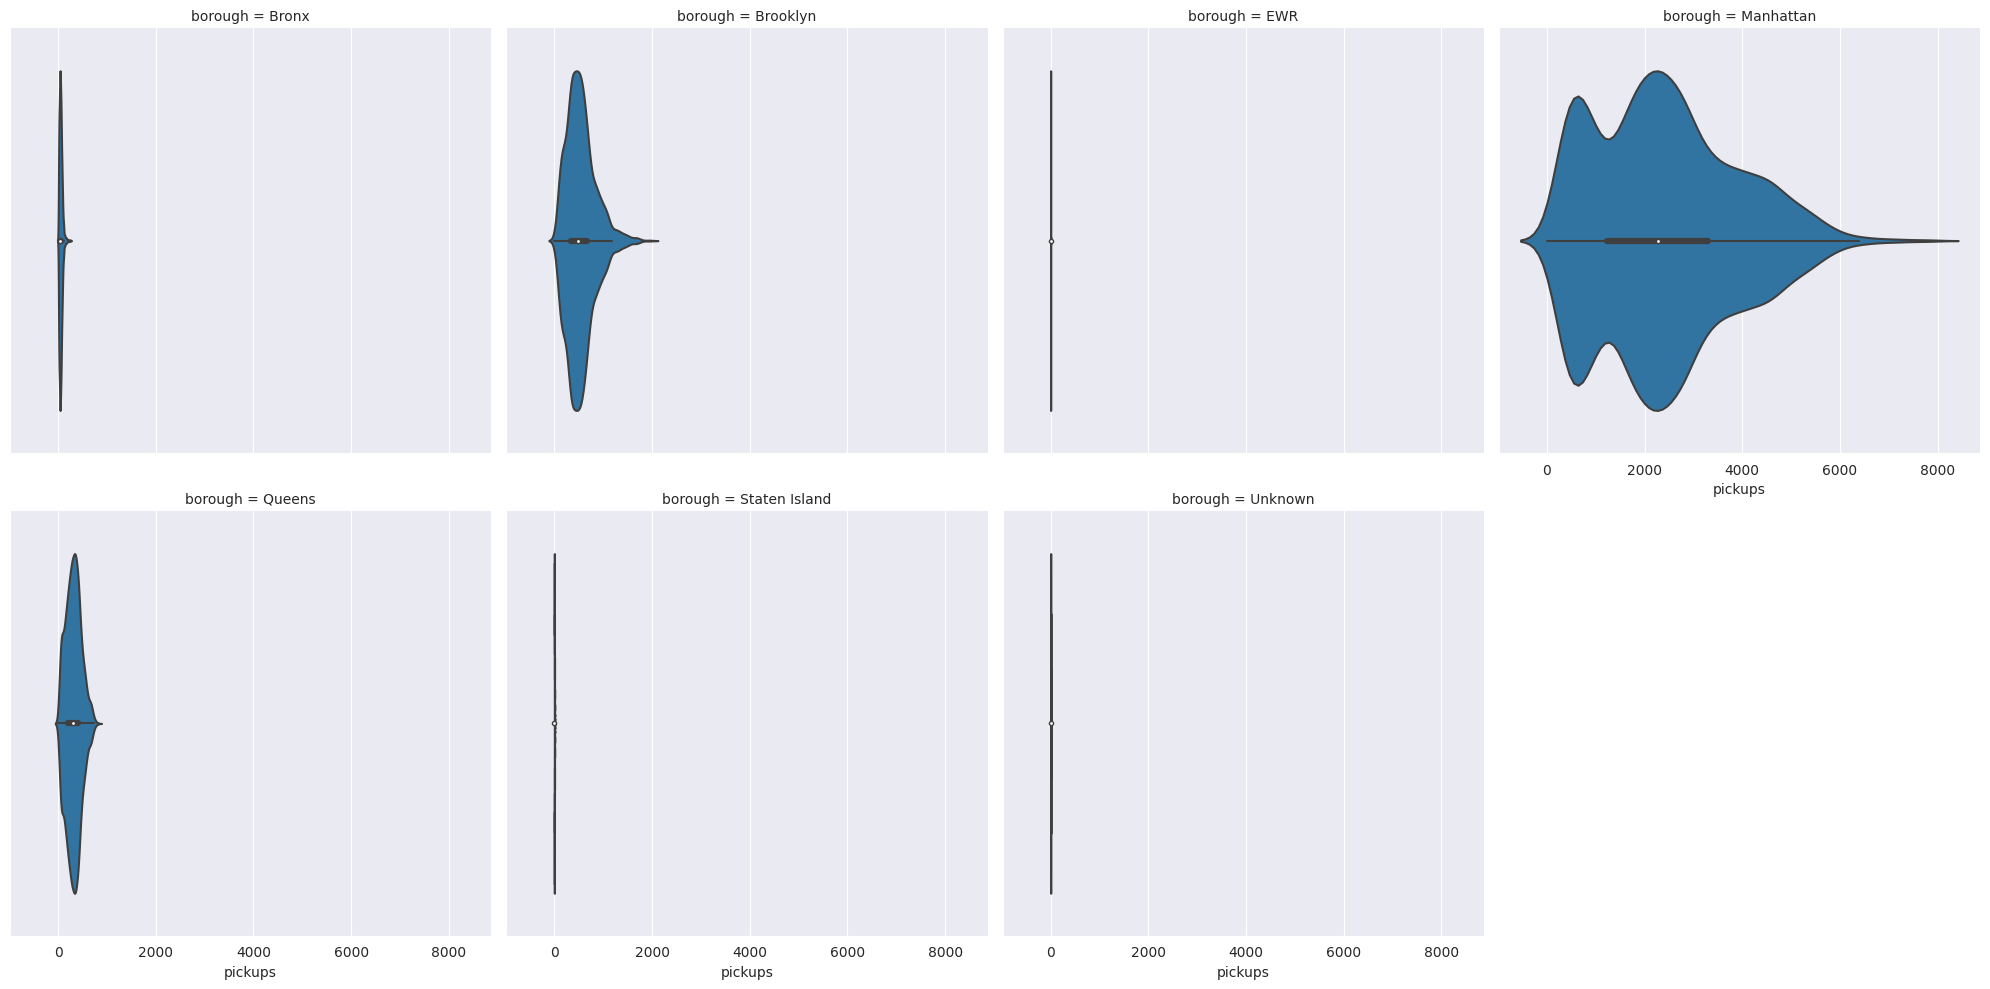

In [55]:
sns.catplot(x = 'pickups', col = 'borough', data= data, col_wrap = 4, kind ='violin');

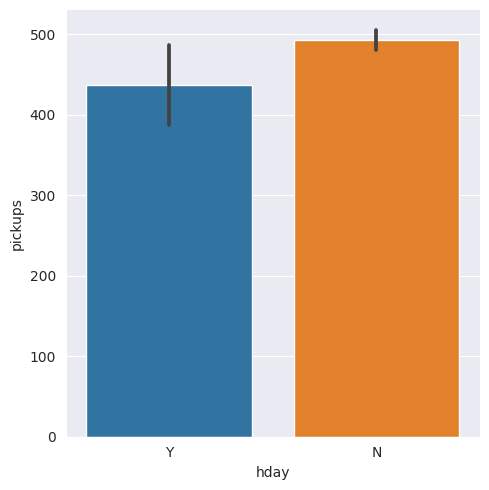

In [56]:
sns.catplot(x='hday', y= 'pickups', data = data, kind = 'bar');

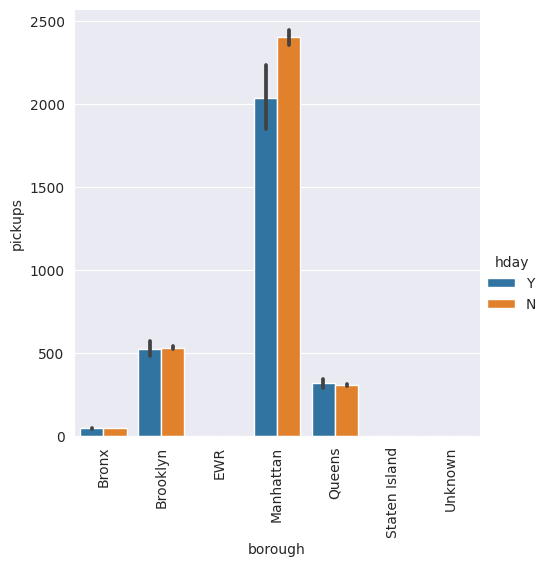

In [58]:
sns.catplot(x='borough', y= 'pickups', data = data, kind = 'bar', hue ='hday')
plt.xticks(rotation = 90)
plt.show()

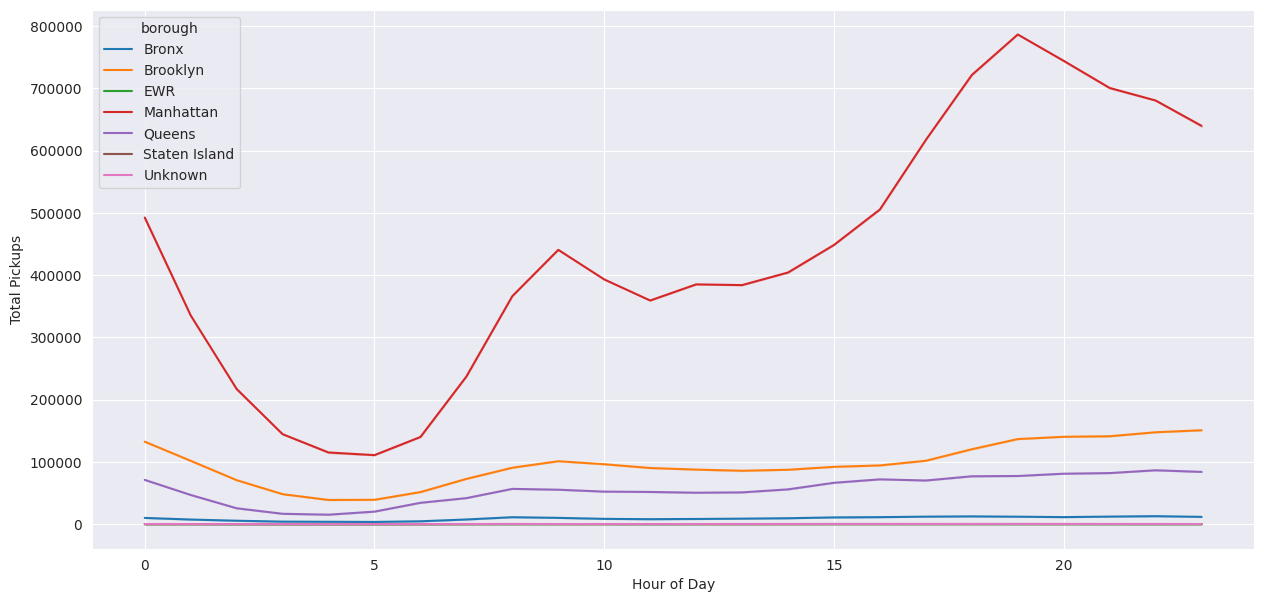

In [59]:
plt.figure(figsize =(15,7))
sns.lineplot(data = data, x='start_hour', y = 'pickups',hue = 'borough',errorbar=('ci', False), color = 'red', estimator = 'sum')
sns.set_style("darkgrid")
plt.ylabel('Total Pickups')
plt.xlabel('Hour of Day')
plt.show()